# K-Means

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/k-means.ipynb)

Le k-means est un algorithme de regroupement (clustering) utilisé en analyse de données et en apprentissage automatique. Son objectif est de diviser un ensemble de données en plusieurs groupes homogènes, appelés clusters, en fonction de similarités entre les points de données. L'algorithme fonctionne de la manière suivante :

1. Sélectionnez un nombre k de clusters que vous souhaitez obtenir.
2. Initialisez k centroïdes, généralement de manière aléatoire, qui représentent les centres présumés de ces clusters.
3. Assignez chaque point de données au cluster dont le centroïde est le plus proche, en utilisant une mesure de distance, souvent la distance euclidienne.
4. Recalculez les centroïdes de chaque cluster en utilisant la moyenne des points de données qui lui sont assignés.
5. Répétez les étapes 3 et 4 jusqu'à ce que les centroïdes ne changent que très peu ou jusqu'à atteindre un nombre prédéfini d'itérations.

L'algorithme converge vers une solution où les points de données similaires se regroupent dans des clusters distincts. Le choix de k peut être crucial, car il influe sur la qualité des clusters. K-means est largement utilisé dans la segmentation de clients, la compression d'images, la classification de documents, et bien d'autres domaines où la regroupement de données est nécessaire.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/K-means_clustering)

In [20]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U matplotlib
# !pip3 install -q -U scikit-learn

## Données

Création d'un jeu de données synthétiques:

In [21]:
from sklearn.datasets import make_blobs

random_state=123

# Des clusters pas très détachés 
# X, labels = make_blobs(n_samples=500, centers=4, cluster_std=1, random_state=random_state)

# Des clusters bien détachés
X, labels = make_blobs(n_samples=500, centers=[(-2, 2), (2, 2), (2, -2), (-2, -2)], cluster_std=0.4, random_state=random_state)

Visualisation:

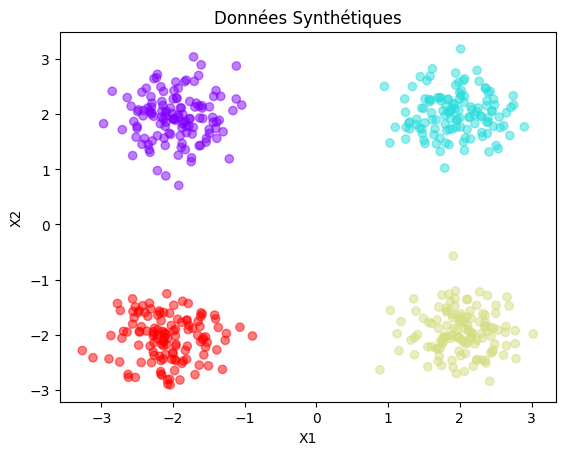

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5, cmap='rainbow')
plt.title("Données Synthétiques")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## K-Means avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score

kmeans = KMeans(n_clusters=4, random_state=random_state)
kmeans.fit(X)

silhouette = silhouette_score(X, kmeans.labels_)
print(f"Score de silhouette : {silhouette}")

rand = rand_score(labels, kmeans.labels_)
print(f"Score de rand : {rand}")

Score de silhouette : 0.810136867716804
Score de rand : 1.0


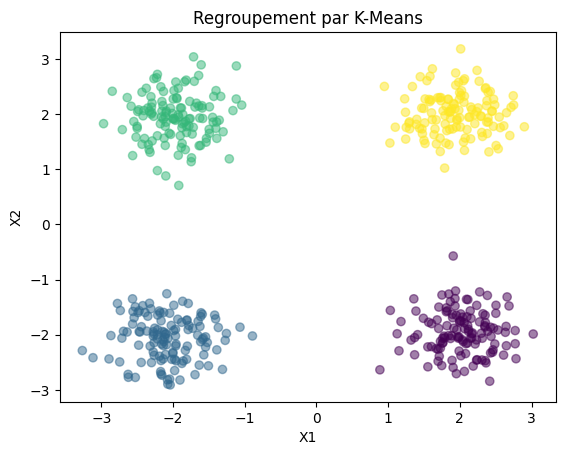

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.5, cmap='viridis')
plt.title("Regroupement par K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()